<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир
Цель - определить центр и нецентр в данных. Задачи - провести исследовательский анализ и определить зону увеличения темпов роста.

## Изучение данных из файла

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime 


In [2]:
df = pd.read_csv('https://www.dropbox.com/s/yshqe0327a4k8b9/real_estate_data_Petersburg.csv?dl=1', sep = '\t', decimal = '.') #разделим данные с помощью табуляции, десятые доли разделим точкой

In [3]:
df.info() #исследуем данные на предмет пропущенных значений и количества строк, а также формата

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
display(df.head(5)) #рассмотрим "голову и хвост" информации для  определения характера данных (в т.ч. типа object)
display(df.tail(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

Первоначальное знакомство с файлом показало, что из 22 столбцов фрейма, 14 содержат пропущенные значения, при этом пропуски встречаются как в категориях, так и в количественных значениях. Для заполнения пропущенных значений, необходимо оценить их характер и степень случайности.

## Предобработка данных

Для заполнения пропущенных значений в столбцах оценим коэффициенты корелляции Пирсона между ними. При наличии связи между столбцами, возможно определить характер этой связи, а также дополнительную информацию (принадлежность к категории) для заполнения пропущенных значений.

In [5]:
df.corr() #с помощью даного метода определим наиболее связанные между собой параметры

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Опишем основные показатели столбцов с количественнымии данными (далее будем использовать эти данные):

In [6]:
print (df.describe()) #рассмотрим подробнее каждый столбец количественных данных с помощью метода describe()

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

**Замена пропущенных значений:**

***Пропущенные значению по столбцу 'ceiling_height'*** 

In [7]:
df.query('ceiling_height == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Столбец 'ceiling_height' слабо коррелирует с другими столбцами (исходя из данных функции corr(), вызванной ранее). Исходя из информации, которую вернул describe, стандартное отклонение говорит о значительных выбросах, повлияющих на **среднее** значение Таким образом заполнение пропущенных значений можно произвести устойчивой к выбросам медианой.

In [8]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace = True) #заполняем пропущенные значения медианой

***Подобным образом заполним пропущенные значения в столбце 'days_exposition'.***

In [9]:
df['days_exposition'].fillna(df['days_exposition'].median(), inplace = True)

***Значения в столбце floors_total*** заменим в следующей логике:
    пропущенное floors_total заменить на медианное значение, если медианное выше чем в столбце floor, принять значение floor. формат Floor total изменить на int.

In [10]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median()) #меняем пропущенные значения на медианные

floor_incorrect = df[df['floor'] > df['floors_total']] #проверяем логику: этаж квартиры не должен превышать этажность строения
#floor_incorrect.info()


def floor_incorrect_fill (row): #если этаж квартиры превышает этажность дома, меняем значение этажность на квартирное
    floor = row['floor']
    floors_total = row['floors_total']
    if floor > floors_total:
        return floor
    else:
        return floors_total
df['floors_total'] = df.apply(floor_incorrect_fill, axis = 1) #преобразуем столбец с этажностью с помощью метода apply
#print (df.info())

floor_incorrect = df[df['floor'] > df['floors_total']] #проверяем наличие некорректных значений
#print (floor_incorrect)

df['floors_total'] = df['floors_total'].astype('int') #изменим тип данныхМолодец, хороший тон использовать метод info() для получения общей информации из таблицы. Для более детального исследования можно воспользоваться методом describe().
    
#df.info()

***Заполним столбец 'living_area'***. Данный столбец показывает сильную корелляцию со столбцом 'total_area' и 'rooms' 
Воспользуемся уже известными данными из столбца 'rooms'. Заменим соответствующие средние значения жилой площади в соответствии с количеством комнат квартиры.


In [11]:
#df['living_area'].value_counts()
empty_living_area = df[df['living_area'].isna() == True] #создадим и рассмотрим фрейм с пропущенными значениями
print (empty_living_area)

       total_images  last_price  total_area first_day_exposition  rooms  \
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
7                 5   7915000.0       71.60  2019-04-18T00:00:00      2   
30               12   2200000.0       32.80  2018-02-19T00:00:00      1   
37               10   1990000.0       45.80  2017-10-28T00:00:00      2   
44               13   5350000.0       40.00  2018-11-18T00:00:00      1   
...             ...         ...         ...                  ...    ...   
23642            14   5950000.0       80.30  2018-07-03T00:00:00      3   
23663            12   6400000.0       88.00  2018-01-12T00:00:00      4   
23670             9   2450000.0       45.60  2018-02-08T00:00:00      1   
23679             0   2500000.0       35.00  2017-12-08T00:00:00      1   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
3                2.65 

Определим ***медианные значения*** жилой площади квартиры в соответствии с ***числом комнат***. И заполним пропущенные значения в соответствии с числом комнат.

In [12]:
empty_living_area['rooms'].value_counts()
#обнаружены квартиры с числом комнат 0
#создаём переменные - медианные значения жилой площади в соответствии с общей площадью
median_area_0_rooms = df[df['rooms'] == 0]['living_area'].median()
median_area_1_rooms = df[df['rooms'] == 1]['living_area'].median()
median_area_2_rooms = df[df['rooms'] == 2]['living_area'].median()
median_area_3_rooms = df[df['rooms'] == 3]['living_area'].median()
median_area_4_rooms = df[df['rooms'] == 4]['living_area'].median()
median_area_5_rooms = df[df['rooms'] == 5]['living_area'].median()
median_area_6_rooms = df[df['rooms'] == 6]['living_area'].median()
median_area_7_rooms = df[df['rooms'] == 7]['living_area'].median()
median_area_9_rooms = df[df['rooms'] == 9]['living_area'].median()


df['area_empty'] = df['living_area'].isna() == True #создаём столбец с булевыми значениями на предмет пропусков в 'living_area'

def empty_living_area_fill(row): #создаём функцию для замены пропущенных значений площади по медиане по количеству комнат
    living_area = row['living_area']
    if (row['area_empty'] == True) and (row['rooms'] == 0):
        return median_area_0_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 1):
        return median_area_1_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 2):
        return median_area_2_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 3):
        return median_area_3_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 4):
        return median_area_4_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 5):
        return median_area_5_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 6):
        return median_area_6_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 7):
        return median_area_7_rooms
    elif (row['area_empty'] == True) and (row['rooms'] == 9):
        return median_area_9_rooms
    else:
        return living_area

df['living_area'] = df.apply(empty_living_area_fill, axis = 1) #применяем метод apply 
df = df.drop('area_empty', axis = 1) #удаляем лишний столбец
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000 

Проверим логику заполнения столбца living_area. В случае превышения living_area над total_area изменим значение столбца living_area в соответствии со средним процентом. В случае превышения living_area над total_area изменим значение в соответствии с долей жилой площади к общей, взятой по медиане столбцов.

In [13]:
median_part_living_area = df['living_area'].median()/df['total_area'].median()
print (median_part_living_area)

def median_part_living_area_fill(row):   #функция для корректировки нарушений логики, если жилая выше общей = заменить жилую, умножив среднюю долю жилой на общую
    total_area = row['total_area']
    living_area = row['living_area']
    true_living_area = total_area * median_part_living_area
    if living_area > total_area:
        return true_living_area
    else:
        return living_area

df['living_area'] = df.apply(median_part_living_area_fill, axis = 1)

print (df.query('living_area > total_area'))

# ошибки в количестве 22 строк исправлены

0.5826923076923077
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


In [14]:

df['is_apartment'].value_counts()
df['is_apartment'] = df['is_apartment'].fillna(False) #пропущенные значения в столбце 'is_appartment' примем как отрицательное булево значение, исходя из принципа - не указано, значит "нет"
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

***Заполним пропущенные значения в столбце 'balcony'*** на нулевое значение, исходя из принципа: не указано - не существует.

In [15]:
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

***заполним площадь кухни 'kitchen_area' исходя из медианной доли площади приходящейся на кухню от общей площади.***

In [16]:
df['empty_kitchen'] = df['kitchen_area'].isnull()
part_of_kitchen = df['kitchen_area'].median()/ df['total_area'].median()
def empty_kitchen_fill(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    empty_kitchen = row['empty_kitchen']
    true_kitchen = total_area * part_of_kitchen
    if empty_kitchen == True:
        return true_kitchen
    else:
        return kitchen_area
    
df['kitchen_area'] = df.apply(empty_kitchen_fill, axis = 1)

df = df.drop('empty_kitchen', axis = 1)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

Удалим дубликаты

In [17]:
#df.info()
df = df.drop_duplicates() 
#df.info()
#дубликатов не обнаружено


Пропущенные значения в сопоставимом количестве встречаются одновременно в столбцах: 
'airports_nearest'        
'cityCenters_nearest'     
'parks_around3000'        
'ponds_around3000'        
что может быть связано с ошибками программного/системного характера, или применением таких признаков только к крупному городу (в данном случае СПб) автоматического расчёта расстояния до объектов, сформированный баг фрейм - ниже.

In [18]:
bug_geo_df = df.query('ponds_nearest.isnull() == True & ponds_around3000.isnull() == True & parks_nearest.isnull() == True & parks_around3000.isnull() == True & cityCenters_nearest.isnull() == True')
#фрейм с одновременным отсутствием значений,

заполнить пропуски данных в этих столбцах невозможно, в рамках задач - без них можно обойтись.

***Изменение типа данных***
Изменим типы данных в столбцах first_day_exposition на datetime, balcony,days_exsposition  на int64 (в данный момент там вещественные числа, число балконов в доме не может быть дробным, число дней также представлено в виде целых чисел (с нулевой дробной частью))

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['balcony'] = df['balcony'].astype('int64')
df['days_exposition'] = df['days_exposition'].astype('int64')
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

**Вывод** 
Таблица предобработана, типы данных приведены в соответствие по существу и готовы для анализа.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу 5 столбцов:

- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (варианты группы: первый, последний, другой)
- соотношение жилой и общей площади
- отношение площади кухни к общей.

In [20]:
df['price_square'] = df['last_price'] / df['total_area'] #цену за метр определим отношением столбцов 

df['weekday_publication'] = pd.DatetimeIndex(df['first_day_exposition']).weekday #создаём столбец с днём недели
df['month_publication'] = pd.DatetimeIndex(df['first_day_exposition']).month #создаём столбец с месяцем
df['year_publication'] = pd.DatetimeIndex(df['first_day_exposition']).year #создаём столбец с годом

def floor_type_fill (row): #создаём функцию для заполнения нового столбца с типом этажа (первый последний другой)
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1 or floor == 0:
        return str('первый')
    elif floor == floors_total:
        return str('последний')
    else:
        return str('другой')
df['floor_type'] = df.apply(floor_type_fill, axis = 1) #заполняем столбец методом apply

df['part_of_living_area'] = df['living_area'] / df['total_area'] #создаём столбец с долей жилой площади

df['part_of_kitchen_area'] = df['kitchen_area'] / df['total_area']  #создаём столбец с долей кухонной площади

#создадим новый фрейм с 5ю новыми столбцами, опишем их с помощью describe
new_table = pd.concat([df['price_square'], df['weekday_publication'], df['month_publication'], df['year_publication'], df['floor_type'], df['part_of_living_area'], df['part_of_kitchen_area']], axis=1)

print (df['weekday_publication'].value_counts())
print (df['month_publication'].value_counts())
print (df['year_publication'].value_counts())
print (new_table.describe())

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday_publication, dtype: int64
2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month_publication, dtype: int64
2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_publication, dtype: int64
       price_square  weekday_publication  month_publication  year_publication  \
count  2.369900e+04         23699.000000       23699.000000      23699.000000   
mean   9.942166e+04             2.569307           6.400101       2017.367146   
std    5.030680e+04             1.789082           3.491561          1.039771   
min    1.118349e+02             0.000000           1.000000       2014.000000   
25%    7.658547e+04             1.000000           3.000000       2017.000000   
50%    9.500000e+04             3.000000           6.000000       2017.000000   
75%    1.142563e+05             4.0000

**Выводы** основные показатели по столбцам:
- нормальные значения цены квадратного метра: от 76,5 тыс. руб/м2 до 114,2 тыс. руб. м2
- больше всего публикаций происходит в рабочие дни (четверг), в выходные гораздо меньше (более чем в 2 раза). По месяцам с февраля по апрель, с октября по ноябрь. Больше всего объявлений было размещено в 2018 году.
- нормальные значения доли жилой площади и кухни составляют от 49% до 63,8% (внутри boxplot())и от 13,7% од 22,4% соответственно.
- Максимальные значения вместе с данными о межквартильном размахе в этих столбцах показывают наличие выбросов, которые необходимо обработать (привести в соответствие или удалить)

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков посредством вызова метода describe() к соответствующим столбцам. Для этого создадим новый датафрейм с этими столбцами (в том числе для поиска взаимозависимости между ниими)

__________________describing_data__________________
         total_area    last_price         rooms  ceiling_height
count  23699.000000  2.369900e+04  23699.000000    23699.000000
mean      60.348651  6.541549e+06      2.070636        2.724358
std       35.654083  1.088701e+07      1.078405        0.988298
min       12.000000  1.219000e+04      0.000000        1.000000
25%       40.000000  3.400000e+06      1.000000        2.600000
50%       52.000000  4.650000e+06      2.000000        2.650000
75%       69.900000  6.800000e+06      3.000000        2.700000
max      900.000000  7.630000e+08     19.000000      100.000000
___________________correlation_____________________
                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.653675  0.758344        0.080613
last_price        0.653675    1.000000  0.363343        0.064425
rooms             0.758344    0.363343  1.000000        0.047991
ceiling_height    0.080613    0.064425  0.047991        1.00

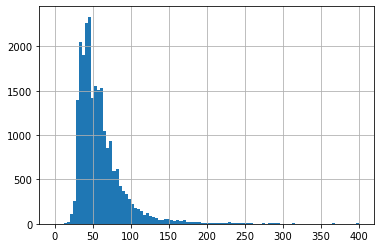

In [21]:
#объединяем столбцы с общей площадью, ценой помещения, количеством комнат, высотой потолков)
research_tablet = pd.concat([df['total_area'], df['last_price'], df['rooms'], df['ceiling_height']], axis=1)
print('__________________describing_data__________________')
print (research_tablet.describe())    #описываем столбцы
print('___________________correlation_____________________')
print (research_tablet.corr()) #находим зависимости между этими столбцами

print(research_tablet['total_area'].hist(bins = 100, range = (0,400))) #построим гистограмму столбца площади жилья

AxesSubplot(0.125,0.125;0.775x0.755)


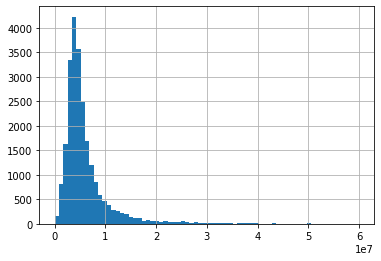

In [22]:
print (research_tablet['last_price'].hist(bins = 70, range = (0,60000000))) #строим гистограмму стоимости жилья

AxesSubplot(0.125,0.125;0.775x0.755)


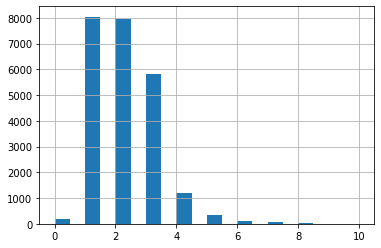

In [23]:
print (research_tablet['rooms'].hist(bins = 20, range = (0,10)))#строим гистограмму по количеству комнат

AxesSubplot(0.125,0.125;0.775x0.755)


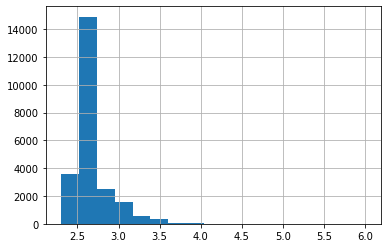

In [24]:
print (research_tablet['ceiling_height'].hist(bins = 17, range = (2.3,6))) #строим гистограмму высоты потолков

Все параметры имеют распределение близкое к Пуассоновскому. На графиках видны выбросы, которые также подтверждаются вызовами метода describe(). В качестве необычных значений - ноль комнат, не всегда совпадающих с параметром studio - "True".


***Изучим время продажи квартиры(в днях). Определим средние и медианные значения, а также выбросы в данных***

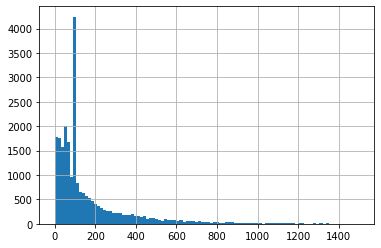

In [25]:

df['days_exposition'].hist(bins = 100, range = (0, 1500))

 на гистограмме виден выброс в районе 95 дней. Рассмотрим столбец на предмет частоты встречающихся величин.

In [26]:
print (df['days_exposition'].value_counts())

95      3245
45       880
60       538
7        234
30       208
        ... 
807        1
871        1
951        1
999        1
1223       1
Name: days_exposition, Length: 1141, dtype: int64


Очевидно, что нормальное Пуассоновское распределение "испорчено" выбивающимся значением 95 дней, вместе с тем, относительно "круглые" цифры, будь то 7, 30, 60, 45 дней, говорят об искусственной "отсечке". Что касается 95 дней - возможно это связано с максимальным сроком размещения объявления; 7, 30, 60, 45 дней - возможно пользователи сервиса предустанавливали срок хранения объявления (или нечто подобное).

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday_publication,month_publication,year_publication,floor_type,part_of_living_area,part_of_kitchen_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.5,22,False,...,0.0,NaN,95,110544.692737,3,4,2019,другой,0.425978,0.263966
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,17.6,3,False,...,1.0,1152.0,95,133750.000000,6,11,2018,другой,0.440000,0.175000
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.3,7,False,...,0.0,NaN,95,102766.798419,6,12,2018,другой,0.598814,0.138340
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.7,9,False,...,0.0,NaN,95,126679.462572,3,1,2019,другой,0.570058,0.159309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.4,17,False,...,0.0,NaN,95,147586.206897,4,11,2018,другой,0.492414,0.107586
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.3,5,False,...,0.0,NaN,95,80322.580645,3,1,2019,последний,0.558065,0.180645
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3.0,381.0,95,72490.845228,1,3,2017,другой,0.547792,0.103356
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,95,44091.710758,6,2,2018,первый,0.523810,0.175000


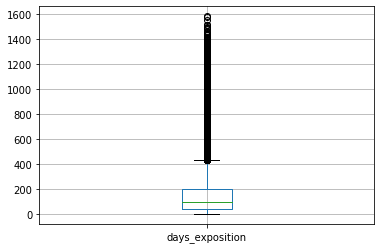

In [27]:
print (df['days_exposition'].describe())
df.boxplot('days_exposition') #оценим выбросы рассматриваемого столбца
df.query('days_exposition == 95') #оценим аномалию, связанную с количеством дней размещения, равному 95 дней

**Фильтры необычных и выдающихся значений** основная задача очистить таблицу от таких значений, сохранив репрезентативную часть таблицы.

С учётом полученных данных и межквартильного размаха, можно отметить, что нормальные значения времени размещения расположены в диапазоне от 45 дней до 199 дней, ниже 45 (граница Q1) расположены крайне быстрые, выше 430 дней (1,5 межквартильного размаха) дней - необычайно долгие продажи. Распределение Пуассоновское, основные выбросы расположены в сторону высоких значений.

Отфильтруем все выдающиеся значения, выходящие за 1.5 межквартильного размаха. Фильтрацию будем проводить по столбцам без пропусков с количественными характеристиками квартиры, имеющим завышенные максимальные значения. Посчитали границу выброса (1,5 интерквартильного размаха от границы третьего квартиля (75% процентиль) для каждого столбца.

Количество строк до фильтрации 23699
Количество строк после фильтрации выбросов по цене квартир 21638 разница составила: 2061


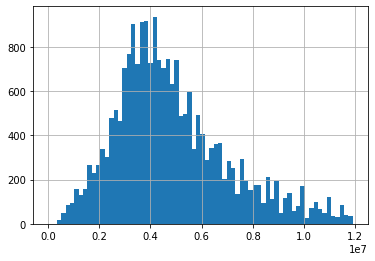

In [28]:
#фильтрация выбросов колонки с ценой квартиры, столбец last_price
print ('Количество строк до фильтрации', len(df))
#определим границу выбросов, 1.5 межквартильного размаха от 3го квартиля
outlie_last_price = (df['last_price'].describe().loc['75%'] - df['last_price'].describe().loc['25%']) * 1.5 + df['last_price'].describe().loc['75%']

filtered_df = df.query ('last_price < @outlie_last_price')
print('Количество строк после фильтрации выбросов по цене квартир', len(filtered_df), 'разница составила:', len(df) - len(filtered_df))
filtered_df['last_price'].hist(bins = 70)

Количество строк до фильтрации на предмет выбросов по столбцу с общей площадью 21638
Количество строк после фильтрации 21186


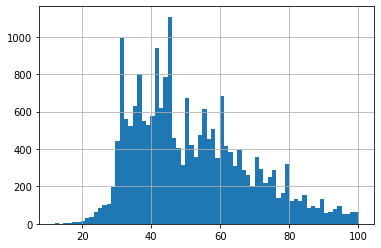

In [29]:
#фильтрация выбросов колонки с общей площадью, столбец 'total_area'
outlie_total_area = (filtered_df['total_area'].describe().loc['75%'] - filtered_df['total_area'].describe().loc['25%']) * 1.5 + filtered_df['total_area'].describe().loc['75%']
print ('Количество строк до фильтрации на предмет выбросов по столбцу с общей площадью', len(filtered_df) )
filtered_df = filtered_df.query ('total_area < @outlie_total_area')
print ('Количество строк после фильтрации', len(filtered_df) )
#print (filtered_df.info())
filtered_df['total_area'].hist(bins = 70)

Количество строк до фильтрации на предмет выбросов по столбцу с количеством комнат 21186
Количество строк после фильтрации 21184


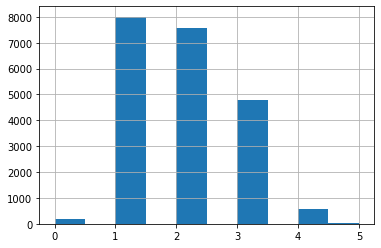

In [30]:
#фильтрация выбросов колонки с количеством комнат, столбец 'rooms'
outlie_rooms = (filtered_df['rooms'].describe().loc['75%'] - filtered_df['rooms'].describe().loc['25%']) * 1.5 + filtered_df['rooms'].describe().loc['75%']
print ('Количество строк до фильтрации на предмет выбросов по столбцу с количеством комнат', len(filtered_df))
filtered_df = filtered_df.query ('rooms < @outlie_rooms')
print ('Количество строк после фильтрации',  len(filtered_df))
#print (filtered_df.info())
filtered_df['rooms'].hist(bins = 10)

Количество строк до фильтрации на предмет выбросов по этажности 21184
Количество строк после фильтрации 21155


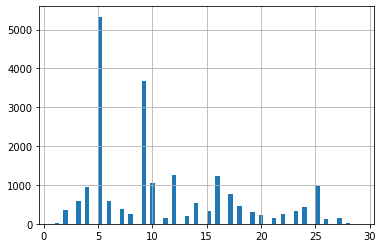

In [31]:
#фильтрация выбросов колонки с высотой этажностью дома, столбец 'floors_total'
#print (filtered_df['floors_total'].describe())
outlie_floors_total = (filtered_df['floors_total'].describe().loc['75%'] - filtered_df['floors_total'].describe().loc['25%']) * 1.5 + filtered_df['floors_total'].describe().loc['75%']
print ('Количество строк до фильтрации на предмет выбросов по этажности', len(filtered_df))
filtered_df = filtered_df.query ('floors_total < @outlie_floors_total')
#filtered_df.info()
filtered_df['floors_total'].min()
print ('Количество строк после фильтрации', len(filtered_df))
#print (outlie_ceiling_height)
filtered_df['floors_total'].hist(bins = 70)

Как видно на графике, есть 2 основные превалирующие категории этажности застройки - это 5 и 9 этажные дома (что объясняется объективными причиными). Синусоидообразность может быть объяснена возрастающими требованиями застройщику (2 лифта на подъезд в случае превышения 9 этажей и пр.), что объясняет снижение числа домов после "границ" таких требований.

Количество строк до фильтрации на предмет выбросов по количеству балконов 21155
2
Количество строк после фильтрации 20730


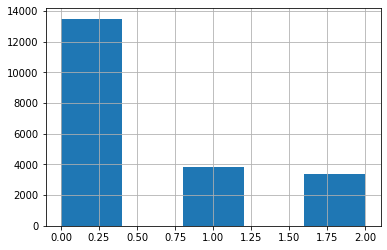

In [32]:
#фильтрация выбросов колонки с числом балконов, столбец 'balcony'

outlie_balcony = (filtered_df['balcony'].describe().loc['75%'] - filtered_df['balcony'].describe().loc['25%']) * 1.5 + filtered_df['balcony'].describe().loc['75%']
print ('Количество строк до фильтрации на предмет выбросов по количеству балконов',len(filtered_df))
filtered_df = filtered_df.query ('balcony < @outlie_balcony')
#filtered_df.info()
print (filtered_df['balcony'].max())
print ('Количество строк после фильтрации', len(filtered_df))
len(filtered_df)
filtered_df['balcony'].hist(bins =5)

Количество строк до фильтрации на предмет длительности размещения 20730
Количество строк после фильтрации 18633


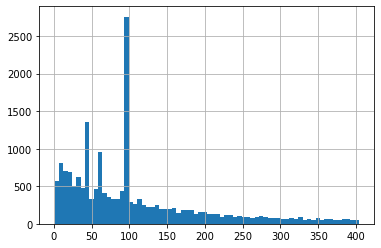

In [33]:
#фильтрация выбросов колонки с числом балконов, столбец 'days_exposition'

outlie_days_exposition = (filtered_df['days_exposition'].describe().loc['75%'] - filtered_df['days_exposition'].describe().loc['25%']) * 1.5 + filtered_df['days_exposition'].describe().loc['75%']

print ('Количество строк до фильтрации на предмет длительности размещения', len(filtered_df))
filtered_df = filtered_df.query ('days_exposition < @outlie_days_exposition')
#filtered_df.info()

print ('Количество строк после фильтрации', len(filtered_df))
filtered_df['days_exposition'].hist(bins = 70)

Количество строк до фильтрации на предмет высоты потолков 18633
Количество строк после фильтрации 18593


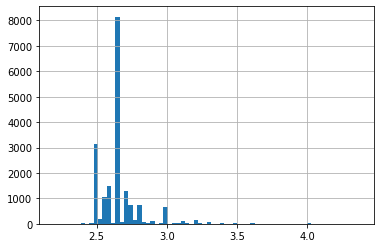

In [34]:
#фильтрация выбросов колонки с высотой потолков, столбец 'ceil_height'. 
#Полтора размаха недостаточно для отсечения выбросов, ввиду особенностей выборки. Определим более или менее разумные величины.

print ('Количество строк до фильтрации на предмет высоты потолков', len(filtered_df))
filtered_df = filtered_df.query ('2 < ceiling_height < 4.5')
#filtered_df.info()

print ('Количество строк после фильтрации', len(filtered_df))
filtered_df['ceiling_height'].hist(bins = 70)

**Выводы по фильтрации** сокращение фрейма составило 5106 строк, содержащих выбросы. 18633 строк - достаточная выборка для продолжения исследования.

**Исследуем зависимости**

- Какие факторы больше всего влияют на стоимость квартиры? 
- Изучите, зависит ли цена от квадратного метра, 
- числа комнат, 
- этажа (первого или последнего), 
- удалённости от центра. 
- Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- "Выберите 10 населённых пунктов с наибольшим числом объявлений. 
- Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
- Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [35]:
corellation_df = filtered_df.corr() #определяем зависимости стоимости квартир от других признаков и столбцов
display (corellation_df['last_price'].sort_values(ascending = False))

last_price              1.000000
total_area              0.674954
price_square            0.650708
living_area             0.517256
kitchen_area            0.482650
rooms                   0.409503
ceiling_height          0.330679
floors_total            0.212002
total_images            0.174133
floor                   0.145767
ponds_around3000        0.128088
parks_around3000        0.103525
year_publication        0.040346
parks_nearest           0.034599
days_exposition         0.025638
is_apartment            0.024668
balcony                 0.022218
month_publication       0.001053
weekday_publication    -0.008046
airports_nearest       -0.026767
part_of_living_area    -0.028186
ponds_nearest          -0.040652
open_plan              -0.048619
studio                 -0.071904
part_of_kitchen_area   -0.082802
cityCenters_nearest    -0.336329
Name: last_price, dtype: float64

**Цены на квартиры зависят от (в порядке убывания):**
- общая площадь
- цена квадрата
- жилая площадь (опосредовано - общая площадь)
- площадь кухни (опосредовано - общая площадь)
- количество комнат (слабая зависимость)
- высота потолков (слабая зависимость)
- отдалённость от центра (слабая обратная зависимость)
- этажность (слабая зависимость)

Остальные признаки - имеют меньшую связь со столбцом 'last_price'

In [36]:
filtered_df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')

,last_price
floor_type,
другой,4500000.0
первый,3750000.0
последний,3950000.0


Как видно из сводной таблицы, самые низкие цены квартир на **первом этаже и последнем этаже**.

In [37]:
pivot_df_locality = filtered_df.pivot_table(index = 'locality_name', values = 'rooms', aggfunc = 'count')
top10 = pivot_df_locality['rooms'].sort_values(ascending = False).head(10) #10 нас. пунктов с самым большим количеством объявлений
print ('10 населённых пунктов с наибольшим числом объявлений:')
print (top10)
list_top10 = top10.index.to_list()

10 населённых пунктов с наибольшим числом объявлений:
locality_name
Санкт-Петербург      11768
посёлок Мурино         464
посёлок Шушары         387
Всеволожск             330
Колпино                296
посёлок Парголово      294
Пушкин                 291
деревня Кудрово        255
Гатчина                254
Выборг                 194
Name: rooms, dtype: int64


In [38]:
pivot_df_weekday = filtered_df.pivot_table(index = 'weekday_publication', values = 'last_price', aggfunc = ['mean','count'])
display(pivot_df_weekday)

,mean,count
,last_price,last_price
weekday_publication,,
0,4.694151e+06,2826
1,4.719913e+06,3281
2,4.703340e+06,3080
3,4.721611e+06,3308
4,4.704236e+06,3173
5,4.614877e+06,1551
6,4.651446e+06,1374


In [39]:
pivot_df_month = filtered_df.pivot_table(index = 'month_publication', values = 'last_price', aggfunc = ['mean','count'])
display(pivot_df_month)

,mean,count
,last_price,last_price
month_publication,,
1,4.674685e+06,1174
2,4.690402e+06,2117
3,4.695500e+06,2029
4,4.788520e+06,1892
5,4.691023e+06,943
6,4.548158e+06,1356
7,4.698839e+06,1309
8,4.733036e+06,1390


наибольшее число объявлений - февраль,март,апрель,октябрь,ноябрь.

In [40]:
pivot_df_year = filtered_df.pivot_table(index = 'year_publication', values = 'last_price', aggfunc = ['mean','count'])
display(pivot_df_year)

,mean,count
,last_price,last_price
year_publication,,
2014,6.491429e+06,7
2015,4.915244e+06,290
2016,4.634341e+06,1668
2017,4.600115e+06,6558
2018,4.679432e+06,7566
2019,5.015699e+06,2504


Годы с наибольшим числом публикаций - 17,18 годы. 14,19 годы - аутсайдеры, вероятно, ввиду неполного года.

In [41]:
print ('Средняя цена квадрата:')
top10_publication = filtered_df[filtered_df['locality_name'].isin(list_top10) == True]
top10_publication.pivot_table(index = 'locality_name', values = 'price_square', aggfunc = 'mean').sort_values(by = 'price_square', ascending = False)

Средняя цена квадрата:


,price_square
locality_name,
Санкт-Петербург,106012.413358
Пушкин,100175.202135
деревня Кудрово,92915.478746
посёлок Парголово,90038.963000
посёлок Мурино,86098.826801
посёлок Шушары,79097.081591
Колпино,75228.404387
Гатчина,68960.934607
Всеволожск,67423.144926


Ожидаемо, что наибольшее значение - СПб. Средняя стоимость в Выборге - 58435 руб., в 2 раза ниже СПб.

**Изучение особенностей рынка недвижимости в СПб**:

In [42]:
spb_locality = filtered_df.query('locality_name == "Санкт-Петербург"') #новый фрейм локации СПб
#spb_locality.info()

spb_locality['km'] = round(spb_locality['cityCenters_nearest'] / 1000, 0) #создаём новый столбец в фрейме с километрами вместо метров
print (spb_locality['km'])

4         8.0
7        12.0
9        15.0
10       14.0
15       14.0
         ... 
23681     7.0
23686    12.0
23687    17.0
23689    16.0
23690     6.0
Name: km, Length: 11768, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,mean,count
,price_square,price_square
km,,
0.0,120940.049353,6
1.0,123463.990209,65
2.0,119857.385118,132
3.0,112610.155347,196
4.0,119252.737385,328
5.0,122846.603610,437
6.0,123216.999980,343
7.0,117514.262322,260


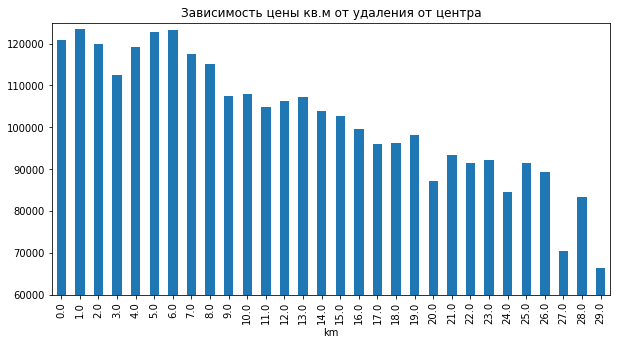

In [43]:
#делаем сводку по средней стоимости квадрата от удалённости
pivot_spb_km = spb_locality.pivot_table(index = 'km', values = 'price_square', aggfunc = 'mean')
#display (pivot_spb_km) 
plt.ylim([60000,125000])

pivot_spb_km['price_square'].plot(kind='bar', figsize = (10,5), title = 'Зависимость цены кв.м от удаления от центра')
display (spb_locality.pivot_table(index = 'km', values = 'price_square', aggfunc = ['mean','count']))

***Вывод*** Наибольший рост цены отмечается с 9 до 8 км. от центра., условно определим её как радиус центральной зоны. Существенные скачки цены с 27 до 26, и с 20 до 19 км. от центра невозможно принять ввиду крайне малой выборки (18 и 1 объявление соответственно). Также наблюдается рост стоимости на протяжении от 17 до 13 км от центра города, однако динамика роста меньше, нежели в центральной зоне.

In [44]:
price_of_1km_to_center = (pivot_spb_km['price_square'].max() - pivot_spb_km['price_square'].min()) / len(pivot_spb_km['price_square'])
print ('Средняя цена квадратного метра на километр отдаления от центра', int(price_of_1km_to_center), 'руб.')

Средняя цена квадратного метра на километр отдаления от центра 1901 руб.


**Анализ центральной зоны** "
вопросы:
- Выделите сегмент квартир в центре. 
- Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
- Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
- Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Разделим массив объявлений на 'центр' и 'нецентр', по условиям: меньше 9 км до центра, больше либо равно 9 км до центра

In [45]:
center_spb_df = spb_locality[spb_locality['km'] < 9]
not_center_spb_df = spb_locality[spb_locality['km'] >= 9]

In [46]:
display (center_spb_df.describe())
display (not_center_spb_df.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday_publication,month_publication,year_publication,part_of_living_area,part_of_kitchen_area,km
count,2150.000000,2.150000e+03,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,...,2150.000000,1512.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,9.739535,6.990743e+06,60.449977,2.146512,2.845949,7.518605,34.994952,4.204651,10.579696,0.267907,...,1.211628,486.541667,114.896279,119235.290744,2.592558,6.515349,2017.485581,0.573052,0.182711,5.281860
std,5.614834,2.131197e+06,18.726382,0.887546,0.299689,4.389100,13.754860,3.118562,4.594579,0.593781,...,1.050761,261.991330,95.372166,28856.301928,1.740638,3.441392,0.913436,0.111857,0.073992,1.947328
min,0.000000,1.600000e+06,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,17391.304348,0.000000,1.000000,2015.000000,0.038462,0.060606,0.000000
25%,6.000000,5.400000e+06,45.600000,2.000000,2.650000,5.000000,24.000000,2.000000,7.800000,0.000000,...,0.000000,266.000000,45.000000,98126.045806,1.000000,3.000000,2017.000000,0.506360,0.133441,4.000000
50%,9.000000,6.850000e+06,60.000000,2.000000,2.700000,6.000000,33.600000,3.000000,9.800000,0.000000,...,1.000000,471.000000,95.000000,115135.895033,3.000000,7.000000,2018.000000,0.585462,0.172288,5.000000
75%,14.000000,8.500000e+06,74.775000,3.000000,3.000000,9.000000,45.000000,5.000000,12.250000,0.000000,...,2.000000,688.250000,158.000000,135714.285714,4.000000,10.000000,2018.000000,0.652367,0.206734,7.000000
max,32.000000,1.189440e+07,100.200000,5.000000,4.370000,28.000000,76.000000,23.000000,48.300000,2.000000,...,3.000000,1199.000000,403.000000,292307.692308,6.000000,12.000000,2019.000000,0.972222,0.612648,8.000000


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday_publication,month_publication,year_publication,part_of_living_area,part_of_kitchen_area,km
count,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,...,9578.000000,4119.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,10.104510,5.146981e+06,50.636213,1.849969,2.642746,12.539883,28.809417,6.738881,9.215151,0.568281,...,0.557632,564.790483,102.994466,102973.673385,2.571622,6.396951,2017.558676,0.561393,0.190167,14.015452
std,5.545641,1.755366e+06,15.779670,0.862440,0.121466,6.249129,11.453938,5.066416,3.379916,0.787673,...,0.742136,279.169935,89.543438,20380.652248,1.799359,3.465319,0.897104,0.103769,0.065098,3.099844
min,0.000000,1.190000e+06,14.000000,0.000000,2.300000,1.000000,3.000000,1.000000,1.300000,0.000000,...,0.000000,16.000000,1.000000,24439.918534,0.000000,1.000000,2014.000000,0.069588,0.043524,9.000000
25%,6.000000,3.899000e+06,38.500000,1.000000,2.550000,9.000000,18.000000,3.000000,6.900000,0.000000,...,0.000000,350.000000,38.000000,88888.888889,1.000000,3.000000,2017.000000,0.492188,0.143478,12.000000
50%,10.000000,4.700000e+06,46.800000,2.000000,2.650000,10.000000,28.300000,5.000000,8.500000,0.000000,...,0.000000,559.000000,86.000000,100432.015825,2.000000,6.000000,2018.000000,0.562500,0.175000,14.000000
75%,14.000000,6.000000e+06,60.487500,2.000000,2.650000,16.000000,37.000000,9.000000,10.800000,1.000000,...,1.000000,782.000000,134.000000,114552.805685,4.000000,10.000000,2018.000000,0.633600,0.230769,16.000000
max,37.000000,1.188000e+07,100.100000,5.000000,4.190000,28.000000,91.785000,26.000000,41.100000,2.000000,...,3.000000,1337.000000,404.000000,312240.000000,6.000000,12.000000,2019.000000,1.000000,0.787879,29.000000


Определим связи между колонками, совместим колонки для сравнительного анализа.

In [47]:
corr_center = center_spb_df.corr()['last_price']
corr_spb = spb_locality.corr()['last_price']
compare_center = pd.concat([corr_center, corr_spb], axis=1).reset_index()
compare_center.columns = ['index','center_price','total_spb_price']
print (corr_center.sort_values(ascending = False))
print ('_______________________________________________________________________________________________________')
print ('Сравнительный анализ корелляции Пирсона между ценой и иными показателям, в центральной части и всем СПб')
print ( compare_center)

last_price              1.000000
total_area              0.704943
living_area             0.529757
kitchen_area            0.463957
rooms                   0.431281
price_square            0.326092
ceiling_height          0.187995
floor                   0.150296
floors_total            0.117621
total_images            0.117344
ponds_around3000        0.093949
days_exposition         0.073278
parks_around3000        0.064265
balcony                 0.055543
parks_nearest           0.052720
year_publication        0.046678
weekday_publication     0.031240
airports_nearest       -0.011648
is_apartment           -0.015116
month_publication      -0.028272
ponds_nearest          -0.036599
part_of_kitchen_area   -0.060605
part_of_living_area    -0.069891
open_plan              -0.080833
studio                 -0.101878
cityCenters_nearest    -0.169504
km                     -0.171271
Name: last_price, dtype: float64
____________________________________________________________________________

Исследовательский анализ показал, что большинство распределений в столбцах имеют вид близкий к Пуассоновским. Данные обладали выбросами, чаще сосредоточенными в сторону "справа" от основной массы точек распределения. Фильтрация лишила данные существенной части (более 20%) строк, однако, не лишив данные репрезентативности. 

## Общий вывод

Работа с данными показала, что существует ряд зависимостей, которые могут объяснить рост цены квартиры и стоимости квартиры. Определяющими из них являются: 
- локация
- количество комнат
- этаж (первый или последний - дешевле)
- в СПб - отдалённость от центра
- стоимость квадратного метра
- высота потолков (за пределами центральной зоны в большей части)

Центральная часть СПб определена в радиусе 9 км. от условного центра.

При этом, сравнивая СПб в целом и его центральную часть, можно отметить, что внутри центральной зоны корелляция цены квартир и расстояния до самого центра - ниже. Иными словами - внутри центральной зоны - отдалённость от условного центра меньше влияет на цену, нежели за пределами этой зоны.

Высота потолков в центральной зоне выше, чем в целом по СПб, что может быть объяснено плотностью "старой" застройки с высокими потолками. Этим может объясняться положительная корелляция между стоимостью и высотой потолков.

Каждый километр приближения к центру добавляет к стоимости 1,9 тыс руб, однако если рассматривать эту зависимость (отдаления от центра), всё выглядит не так однородно. Визуально, на графике чётко отражены три зоны: 26 - 17 км, 17 - 9 км, 9 и менее км. Очевидно, что среди геохарактеристик именно отдаление от центра является наиболее существенным фактором роста цены квадратного метра, наличие водоёмов, парков, аэропорта влияют на цену метра в меньшей степени.




In [48]:
price_square_corr = spb_locality.corr()['price_square']
price_square_center_corr = center_spb_df.corr()['price_square']
compare_square_concat = pd.concat([price_square_corr , price_square_center_corr], axis=1).reset_index()
display (compare_square_concat)

,index,price_square,price_square
0,total_images,0.125723,0.118822
1,last_price,0.439381,0.326092
2,total_area,-0.182018,-0.401811
3,rooms,-0.354470,-0.472235
4,ceiling_height,0.201232,-0.026191
5,floors_total,0.206903,0.270321
6,living_area,-0.290139,-0.461836
7,floor,0.170125,0.221107
8,is_apartment,0.007185,-0.003800
9,studio,0.057610,0.056938


Любопытный факт - стоимость квадратного метра имеет обратную зависимость с метражом квартиры и количеством комнат. Таким образом, формирование системы оценки объектов недвижимости может использовать эту зависимость для расчёта. Покупать квадратные метры выгоднее - оптом, в центральной зоне - особенно.